# Test DMI Calculation

In [1]:
import sys
sys.path.append('../')
import helpers.fileHandler as fh
import helpers.cvdpTime as cvdpTime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

First load up the cvdp and figure out the details of the index we want to calculate

In [2]:
cvdp = fh.loadModelData('CESM-LME', 'cvdp_data', '001', decode_times=False)
iodCvdp = cvdp.indian_ocean_dipole
del cvdp
iodCvdp = cvdpTime.decodeTime(iodCvdp)
iodCvdp.comment_cvdp

Files imported: 
 ['E:/CMIP5-PMIP3/CESM-LME/cesm1.lm.cvdp_data/b.e11.BLMTRC5CN.f19_g16.001.cvdp_data.850-2005.nc']


'area average domain (-10:10N, 50:70E) - (-10:0N, 90:110E)'

In [3]:
ds = fh.loadModelData('CESM-LME', 'SST', '001',drop_variables=('ANGLE','ANGLET', 'DXT', 'DXU', 'DYT', 'DYU', 'HT', 'HTE', 'HTN',
              'HU', 'HUS', 'HUW', 'KMT', 'KMU', 'REGION_MASK', 'T0_Kelvin',
              'UAREA', 'cp_air', 'cp_sw', 'days_in_norm_year', 'dz', 'dzw', 'fwflux_factor', 
              'grav', 'heat_to_PW', 'hflux_factor', 'latent_heat_fusion', 'latent_heat_vapor',
              'mass_to_Sv', 'moc_components', 'momentum_factor','nsurface_t', 'nsurface_u', 
              'ocn_ref_salinity', 'omega', 'ppt_to_salt', 'radius', 'rho_air', 'rho_fw', 'rho_sw',
              'salinity_factor', 'salt_to_Svppt', 'salt_to_mmday', 'salt_to_ppt', 'sea_ice_salinity',
              'sflux_factor', 'sound', 'stefan_boltzmann', 'transport_components', 'transport_regions',
              'vonkar','z_t_150m', 'z_w', 'z_w_bot', 'z_w_top', 'moc_z', 'lat_aux_grid', 'time_bound','z_t') )

Files imported: 
 ['E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.085001-089912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.090001-099912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.100001-109912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.110001-119912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.120001-129912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.130001-139912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.140001-149912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.150001-159912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.160001-169912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.170001-179912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.180001-184

In [4]:
ds

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 13872, z_t: 1)
Coordinates:
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time     (time) object 0850-02-01 00:00:00 ... 2006-01-01 00:00:00
Dimensions without coordinates: nlat, nlon, z_t
Data variables:
    TAREA    (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ULAT     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ULONG    (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    SST      (time, z_t, nlat, nlon) float32 dask.array<chunksize=(600, 1, 384, 320), meta=np.ndarray>
Attributes:
    title:           b.e11.BLMTRC5CN.f19_g16.001
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2013-09-24 at 12:03:37.8
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    750
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0
    NCO:             4.3.7
    history:         Mon Mar 24 10:45:45 2014: ncrename -v TEMP,SST b.e11.BLM...

In [5]:
easternIO=ds.where((ds.TLAT>=-10) & (ds.TLAT<=0) & (ds.TLONG>=90) & (ds.TLONG<=110))
westernIO=ds.where((ds.TLAT>=-10) & (ds.TLAT<=10) & (ds.TLONG>=50) & (ds.TLONG<=70))
del(ds)

In [6]:
easternIO.load()
westernIO.load()

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 13872, z_t: 1)
Coordinates:
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time     (time) object 0850-02-01 00:00:00 ... 2006-01-01 00:00:00
Dimensions without coordinates: nlat, nlon, z_t
Data variables:
    TAREA    (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ULAT     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ULONG    (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    SST      (time, z_t, nlat, nlon) float32 dask.array<chunksize=(600, 1, 384, 320), meta=np.ndarray>
Attributes:
    title:           b.e11.BLMTRC5CN.f19_g16.001
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2013-09-24 at 12:03:37.8
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    750
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0
    NCO:             4.3.7
    history:         Mon Mar 24 10:45:45 2014: ncrename -v TEMP,SST b.e11.BLM...

Sanity check that the areas selected look believable

C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


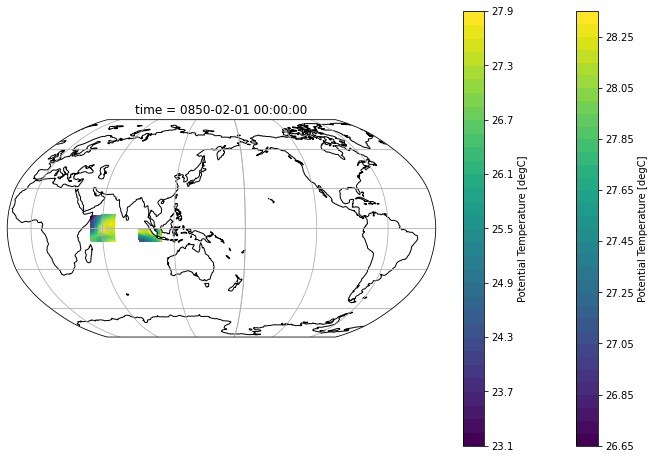

In [7]:
eIOSlice = easternIO.isel(time=0, z_t=0) # select a slice
wIOSlice = westernIO.isel(time=0, z_t=0)

# -- plot the 'quick' way
plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=160))  # set up projection
ax.set_global()

#sst2d.SST.plot.pcolormesh()

eIOSlice.SST.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='TLONG', y='TLAT', center=False, levels=35)

wIOSlice.SST.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='TLONG', y='TLAT', center=False, levels=35)

ax.coastlines()
ax.gridlines()
plt.show()

In [8]:
easternIO

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 13872, z_t: 1)
Coordinates:
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time     (time) object 0850-02-01 00:00:00 ... 2006-01-01 00:00:00
Dimensions without coordinates: nlat, nlon, z_t
Data variables:
    TAREA    (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ULAT     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ULONG    (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    SST      (time, z_t, nlat, nlon) float32 dask.array<chunksize=(600, 1, 384, 320), meta=np.ndarray>
Attributes:
    title:           b.e11.BLMTRC5CN.f19_g16.001
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2013-09-24 at 12:03:37.8
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    750
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0
    NCO:             4.3.7
    history:         Mon Mar 24 10:45:45 2014: ncrename -v TEMP,SST b.e11.BLM...

In [9]:
#calculatedDmi Saji et. al (99)
#the difference in SST anomaly between the tropicalwestern Indian Ocean (50E-70E, 10S-10N) and the tropicalsouth-eastern  Indian  Ocean  (90E-110E,  10S-Equator)

# climatology = "850-2005 climatology removed prior to all calculations (other than means)";

easternSstByMonth=easternIO.SST.isel(z_t=0).groupby('time.month')

easternSstAnom=easternSstByMonth-easternSstByMonth.mean(dim='time')

easternAreaTotal=easternIO.TAREA.isel(time=0).sum()

easternSstAv=(easternSstAnom*easternIO.TAREA.isel(time=0)).sum(dim=('nlat','nlon'))/easternAreaTotal

westernSstByMonth=westernIO.SST.isel(z_t=0).groupby('time.month')

westernSstAnom=westernSstByMonth-westernSstByMonth.mean(dim='time')

westernAreaTotal=westernIO.TAREA.isel(time=0).sum()

westernSstAv=(westernSstAnom*westernIO.TAREA.isel(time=0)).sum(dim=('nlat','nlon'))/westernAreaTotal

calculatedDmi=westernSstAv-easternSstAv

C:\Anaconda3\lib\site-packages\xarray\core\indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 97 times more chunks
  return self.array[key]
C:\Anaconda3\lib\site-packages\xarray\core\indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 97 times more chunks
  return self.array[key]


In [10]:
easternSstAnom

<xarray.DataArray 'SST' (time: 13872, nlat: 384, nlon: 320)>
dask.array<getitem, shape=(13872, 384, 320), dtype=float32, chunksize=(1, 384, 320), chunktype=numpy.ndarray>
Coordinates:
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time     (time) object 0850-02-01 00:00:00 ... 2006-01-01 00:00:00
    month    (time) int64 2 3 4 5 6 7 8 9 10 11 12 ... 3 4 5 6 7 8 9 10 11 12 1
Dimensions without coordinates: nlat, nlon

In [11]:
calculatedDmi

<xarray.DataArray (time: 13872)>
dask.array<sub, shape=(13872,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0850-02-01 00:00:00 ... 2006-01-01 00:00:00
    month    (time) int64 2 3 4 5 6 7 8 9 10 11 12 ... 3 4 5 6 7 8 9 10 11 12 1

C:\Anaconda3\lib\site-packages\dask\array\numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


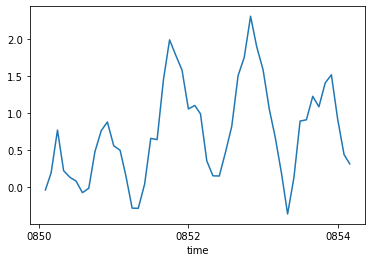

In [12]:
calculatedDmi.isel(time=slice(0,50)).plot.line(x='time')

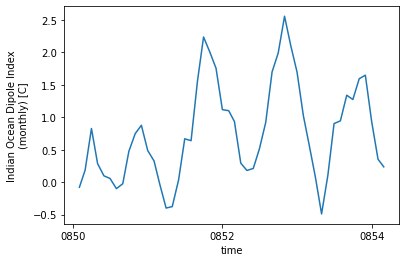

In [13]:
iodCvdp.isel(time=slice(0,50)).plot.line(x='time')

(calculatedDmi-iodCvdp).plot()

In [14]:
iodCvdp

<xarray.DataArray 'indian_ocean_dipole' (time: 13872)>
dask.array<open_dataset-2d7c3e79e0bb09b33c84cd8c1ecf7291indian_ocean_dipole, shape=(13872,), dtype=float32, chunksize=(13872,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0850-02-01 00:00:00 ... 2006-01-01 00:00:00
Attributes:
    comment_cvdp:  area average domain (-10:10N, 50:70E) - (-10:0N, 90:110E)
    units:         C
    long_name:     Indian Ocean Dipole Index (monthly)

In [15]:
(calculatedDmi-iodCvdp)

<xarray.DataArray (time: 13872)>
dask.array<sub, shape=(13872,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0850-02-01 00:00:00 ... 2006-01-01 00:00:00
    month    (time) int64 2 3 4 5 6 7 8 9 10 11 12 ... 3 4 5 6 7 8 9 10 11 12 1

In [16]:
iodCvdp.head(50).values

array([-0.07803801,  0.18541205,  0.82639635,  0.2855269 ,  0.0974329 ,
        0.05688259, -0.09947637, -0.02419329,  0.476533  ,  0.7481036 ,
        0.8761255 ,  0.48737496,  0.32636273, -0.03203028, -0.39851424,
       -0.37559378,  0.03501093,  0.66785675,  0.63895696,  1.5492964 ,
        2.2355864 ,  2.0009034 ,  1.7542498 ,  1.117693  ,  1.1003385 ,
        0.93376315,  0.29334494,  0.18072404,  0.21122979,  0.51185083,
        0.9209423 ,  1.6975329 ,  1.9892886 ,  2.5550508 ,  2.1076934 ,
        1.6964377 ,  1.0230281 ,  0.5795675 ,  0.07374007, -0.48864767,
        0.11183815,  0.9019313 ,  0.9446378 ,  1.3388906 ,  1.2728944 ,
        1.5927138 ,  1.6475638 ,  0.93111503,  0.35272384,  0.23636106],
      dtype=float32)

In [17]:
calculatedDmi.head(50).values

C:\Anaconda3\lib\site-packages\dask\array\numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array([-0.03988469,  0.19232147,  0.76980092,  0.22010735,  0.13043782,
        0.07986812, -0.07701044, -0.01671586,  0.47677964,  0.76253943,
        0.87908983,  0.55771247,  0.49725526,  0.15618515, -0.28604784,
       -0.2885153 ,  0.0387153 ,  0.65770588,  0.64104651,  1.45030254,
        1.99056185,  1.77760251,  1.57981736,  1.05551737,  1.10326675,
        0.98964433,  0.3526407 ,  0.15096514,  0.14843681,  0.46572324,
        0.82124842,  1.50696362,  1.75332758,  2.30981112,  1.89726298,
        1.58645148,  1.04551956,  0.6803603 ,  0.18809139, -0.36426266,
        0.12823465,  0.89155469,  0.9089702 ,  1.22669215,  1.08460949,
        1.40804076,  1.5178664 ,  0.91382236,  0.43840175,  0.31175991])